<h1> Unit 8 Homework KEY</h1>
<h3> W203 Statistics for Data Science </h3>

Student Name: 

Section Number:

** Data: ** The file GPA1.RData contains data from a 1994 survey of MSU students.  The survey was conducted by Christopher Lemmon, a former MSU undergraduate, and provided by Wooldridge.

** Context: ** The skipped variable represents the average number of lectures each respondent skips per week.  You are interested in testing whether MSU students skip over 1 lecture per week on the average.

In [1]:
library(moments)
load("gpa1.RData")
objects()
head(data)
skip = data$skipped

[1] "data" "desc" "self"

age,soph,junior,senior,senior5,male,campus,business,engineer,colGPA,⋯,greek,car,siblings,bgfriend,clubs,skipped,alcohol,gradMI,fathcoll,mothcoll
21,0,0,1,0,0,0,1,0,3.0,⋯,0,1,1,0,0,2,1.0,1,0,0
21,0,0,1,0,0,0,1,0,3.4,⋯,0,1,0,1,1,0,1.0,1,1,1
20,0,1,0,0,0,0,1,0,3.0,⋯,0,1,1,0,1,0,1.0,1,1,1
19,1,0,0,0,1,1,1,0,3.5,⋯,0,0,1,0,0,0,0.0,0,0,0
20,0,1,0,0,0,0,1,0,3.6,⋯,0,1,1,1,0,0,1.5,1,1,0
20,0,0,1,0,1,1,1,0,3.0,⋯,0,1,1,0,0,0,0.0,0,1,0


**1.0: ** Examine the skipped variable and argue whether or not a t-test is valid for this scenario.

In [2]:
paste('Number of Observations:', length(skip))
summary(skip)

[1] "Number of Observations: 141"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.076   2.000   5.000 

> The $skipped$ variable has 141 observations, the responses range from 0 to 5, and the mean (1.076) is greater than the median (1.00), which indicates a degree of positive skewness in the distribution of $skipped$. There are no missing or unusual observations of note.

> Because the population standard deviation is not known a t-test must be used instead of a z-test.

> Next a histogram confirms that the distribution of $skipped$ is not normal, it is positively skewed and bounded to be non-negative, it is unlikely that with repeated sampling that it would approach normality either.

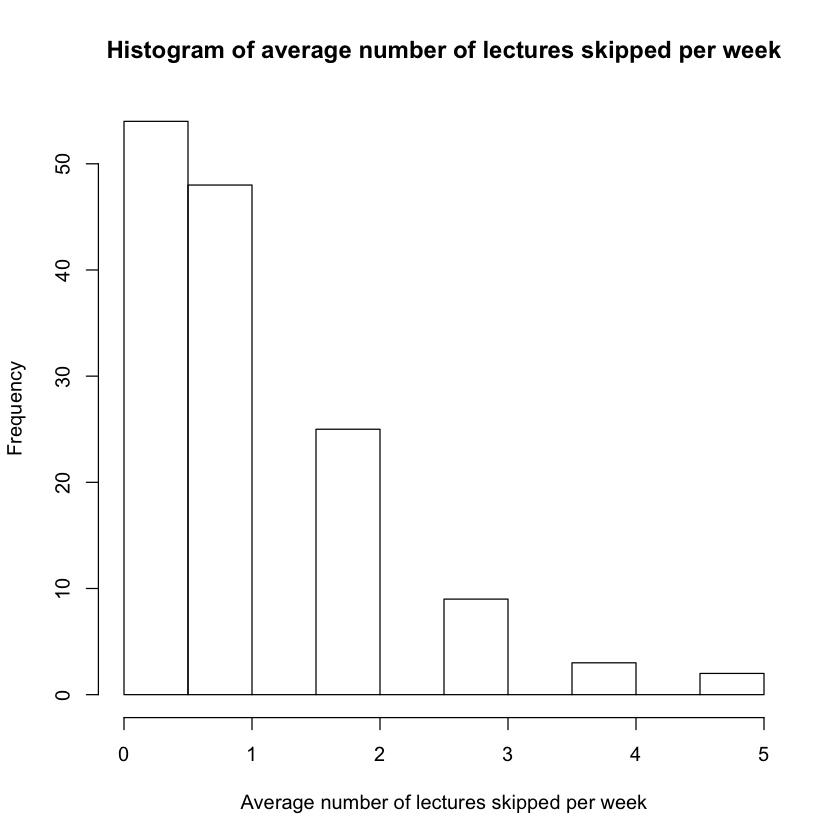

In [3]:
hist(skip, main="Histogram of average number of lectures skipped per week",
     xlab="Average number of lectures skipped per week")

> So technically while the t-test requires the population distribution to be normal, it still remains robust with departures from normality. The distribution is not overly unusual, so the researcher simply needs to be aware of the skew and what that means for their Type I and II errors at either end of the distribution.

> Accordingly, the t-test is valid test in this instance, but given the size of the sample n=`r length(skip)` and hence the large number of degrees of freedom the results will in the end be very similar to that of a z-test.

**2.0: ** How would your answer to part a change if Mr. Lemmon selected dormitory rooms at random, then interviewed all occupants in the rooms he selected?

> By selecting whole dorms, of which the individual beds may not be allocated on a random basis (gender being an obvious one), it may introduce unexpected sampling bias, so the assumptions underlying the use of a t-test would no longer be valid. As such in my view the t-test would not be valid.

**3.0: ** Provide an argument for why you should choose a 2-tailed test in this instance, even if you are hoping to demonstrate that MSU students skip more than 1 lecture per week.

> There is no particular reason to suggest that the number of skipped lectures will be higher or lower than 1 per week, so a one-sided test is not justified. Instead it is better to determine if the average number of lectures is simply different to 1 per week.

**4.0: ** Conduct the t-test using the t.test function and interpret every component of the results.

In [4]:
results = t.test(skip, mu=1)
names(results)
results

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"


	One Sample t-test

data:  skip
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.8949445 1.2575377
sample estimates:
mean of x 
 1.076241 


> Results interpretation:

>a. The name of the data is $skip$.

>b. The numbers of degrees of freedom used for calculation of values from the t curves are $df=140$.

>c. The $p-value$ is the probability that we can get a set of values at least as extreme as those in the sample assuming that $H_0$ is true. In this instance the $p-value$ is 0.407.

>d. The test statistic which is calculated using the methodology in **part (e)** is 0.831.

>e. The sample mean of the sample set is 1.07.

>f. The value of the population mean in the null hypothesis ($H_0$) is 1, i.e. $H_0: \mu = 1$.

>g. The alternative hypothesis ($H_1$) is two sided, i.e. $H_1: \mu \neq 1$.

>h. The test method is a One sample t test, which is because we are comparing one sample mean against a fixed hypothesis value of 1.

>i. Finally using the sample mean, the sample standard deviation, the test statistic and the number of observations, the 95% confidence interval is computed as (0.894,1.25) using the same methodology as **part (f)**.

**5.0: ** Show how you would compute the t-statistic and p-value manually (without using t.test), using the pt function in R.

> The t-statistic is calculated as 

$$t = \cfrac{(\bar{X}-\mu)}{\frac{s}{\sqrt{n}}}$$

> where 

> $\bar{X}$ = mean of $x_i$'s for i = 1,…,n

> $\mu$ = 1 (i.e. being tested for)

> s = sample standard deviation of $x_i$'s for i = 1,…,n

> While the p-value is calculated as: 

> $p-value = 2 * (1 - P(T<|t|,df))$ i.e. the area of two tails above and below $|t|$ with $df =140$.

In [5]:
xbar = mean(skip)
mu = 1
s = sd(skip)
n = length(skip)
t = (xbar-mu)/(s/n^0.5)
t
df = n - 1
df
p = 2 * (1 - pt(t,df))
p
round(t,6) == round(results$statistic,6)
round(p,6) == round(results$p.value,6)

[1] 0.8314156

[1] 140

[1] 0.4071547

t 
TRUE

[1] TRUE

**6.0: ** Construct a 99% confidence interval for the mean number classes skipped by MSU students in a week.

> A 99% confidence interval is constructed as:

$$(\bar{X} - t_{\alpha , df} \cfrac{s}{\sqrt{n}} , \bar{X} + t_{\alpha , df} \cfrac{s}{\sqrt{n}})$$

> where $\alpha = 0.995$ and $df = n - 1 = 140$

> Using R:

In [6]:
T = qt(0.995,df)
T
CI = c(xbar - T*s/n^0.5, xbar + T*s/n^0.5)
CI

[1] 2.611403

[1] 0.8367745 1.3157078

> So the 99% confidence interval is (0.83,1.31), which notably is wider than the 95% CI in **part (d)** as expected.

> Alternatively using $t.test()$:

In [7]:
t.test(skip, mu=1, conf.level = 0.99)


	One Sample t-test

data:  skip
t = 0.83142, df = 140, p-value = 0.4072
alternative hypothesis: true mean is not equal to 1
99 percent confidence interval:
 0.8367745 1.3157078
sample estimates:
mean of x 
 1.076241 


> which produces the same confidence interval as the manual approach.

** 7.0: ** Can you say that there is a 99% chance the population mean falls inside your confidence interval?

> No you can't because this is just one sample from the population, what you can say is that if you repeated the experiment many times that 99% of the confidence intervals would contain the population mean.